In [111]:
import pandas as pd
data = pd.read_csv('form4_update.csv', encoding = 'ISO-8859-1', low_memory=False)

In [112]:
columns = ['NAICSID','ALLCOUNT',
'ALLMENCOUNT',
'ALLWOMENCOUNT',
'ABORIGALLCOUNT',
'ABORIGMENCOUNT',
'ABORIGWOMENCOUNT',
'PWDALLCOUNT',
'PWDMENCOUNT',
'PWDWOMENCOUNT',
'VISMINALLCOUNT',
'VISMINMENCOUNT',
'VISMINWOMENCOUNT']
data[columns] = data[columns].fillna(0)

In [113]:
g = data['GEOGRAPHY'] == 'National'
national = data.loc[g,]

# Women Transport

In [114]:
ind1 = ((national['NAICSID'] > 480) & (national['NAICSID'] < 500)) | ((national['NAICSID'] < 5000) & (national['NAICSID'] > 4800)) | ((national['NAICSID'] > 2200) & (national['NAICSID'] < 2300))
i1 = national.loc[ind1, ]
women_transport = i1.groupby('CALENDARYEAR').sum()

In [164]:
women_transport = women_transport.copy()

female_frac = (women_transport['ALLWOMENCOUNT'] / women_transport['ALLCOUNT']) * 100
women_transport.loc[:,'female_frac'] = female_frac

In [166]:
import matplotlib.pyplot as plt

In [167]:
s = i1['OCCGROUP'] == 'Senior Managers'
ad = i1['OCCGROUP'] == 'Administrative and Senior Clerical Personnel'
m = i1['OCCGROUP'] == 'Middle and Other Managers'
senior = i1.loc[s|ad|m,]
senior_w = senior.groupby('CALENDARYEAR').sum()

In [168]:
senior_w = senior_w.copy()

female_senior_frac = (senior_w['ALLWOMENCOUNT'] / senior_w['ALLCOUNT']) * 100
senior_w.loc[:,'female_frac'] = female_senior_frac

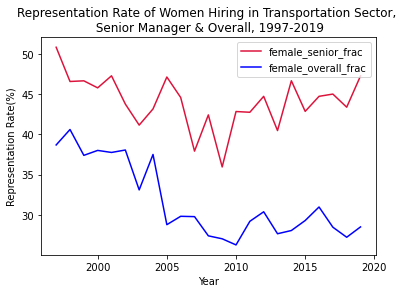

In [171]:
plt.plot(senior_w['female_frac'], label = "female_senior_frac", c='crimson')
plt.plot(women_transport['female_frac'], label = "female_overall_frac", c='blue')
plt.xlabel('Year')
plt.ylabel('Representation Rate(%)')
plt.title('Representation Rate of Women Hiring in Transportation Sector, \n Senior Manager & Overall, 1997-2019')
plt.legend()
plt.show()

# Aboriginal

In [83]:
ind2 = ((national['NAICSID'] > 520) & (national['NAICSID'] < 530)) | ((national['NAICSID'] < 560) & (national['NAICSID'] > 550)) | ((national['NAICSID'] > 5200) & (national['NAICSID'] < 5300)) | (national['NAICSID'] > 5500) & (national['NAICSID'] < 5600)
i2 = national.loc[ind2, ]
abo_bank = i2.groupby('CALENDARYEAR').sum()

In [86]:
abo_frac = abo_bank['ABORIGALLCOUNT'] / abo_bank['ALLCOUNT']
abo_bank.loc[:,'abo_frac'] = abo_frac

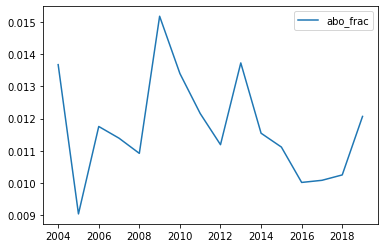

In [87]:
plt.plot(abo_bank['abo_frac'], label = "abo_frac")
plt.legend()
plt.show()

# Disabled

In [94]:
ind3 = ((national['NAICSID'] > 2100) & (national['NAICSID'] < 2200)) | ((national['NAICSID'] > 5600) & (national['NAICSID'] < 5700)) | ((national['NAICSID'] > 5400) & (national['NAICSID'] < 5500)) | (national['NAICSID'] > 9100)
i3 = national.loc[ind3, ]
pwd_other = i3.groupby('CALENDARYEAR').sum()

In [97]:
pwd_frac = pwd_other['PWDALLCOUNT'] / pwd_other['ALLCOUNT']
pwd_other.loc[:,'pwd_frac'] = pwd_frac

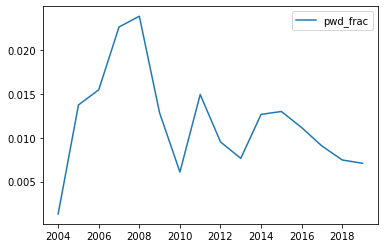

In [98]:
plt.plot(pwd_other['pwd_frac'], label = "pwd_frac")
plt.legend()
plt.show()

# Visible Minority

In [160]:
vis_frac = (pwd_other['VISMINALLCOUNT'] / pwd_other['ALLCOUNT']) * 100
pwd_other.loc[:,'vis_frac'] = vis_frac

In [161]:
s = i3['OCCGROUP'] == 'Senior Managers'
ad = i3['OCCGROUP'] == 'Administrative and Senior Clerical Personnel'
m = i3['OCCGROUP'] == 'Middle and Other Managers'
senior = i3.loc[s|ad|m,]
senior_vis = senior.groupby('CALENDARYEAR').sum()

In [162]:
vis_senior_frac = (senior_vis['VISMINALLCOUNT'] / senior_vis['ALLCOUNT']) * 100
senior_vis.loc[:,'vis_frac'] = vis_senior_frac

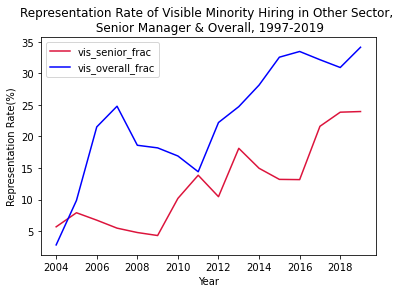

In [170]:
plt.plot(senior_vis['vis_frac'], label = "vis_senior_frac", c='crimson')
plt.plot(pwd_other['vis_frac'], label = "vis_overall_frac", c='blue')
plt.xlabel('Year')
plt.ylabel('Representation Rate(%)')
plt.title('Representation Rate of Visible Minority Hiring in Other Sector, \n Senior Manager & Overall, 1997-2019')
plt.legend()
plt.show()

file_name = 'hire.csv'
national.to_csv(file_name)
print('Sales record successfully exported into CSV File')



vis_frac = women_transport['VISMINALLCOUNT'] / women_transport['ALLCOUNT']
women_transport.loc[:,'vis_frac'] = vis_frac